<a href="https://colab.research.google.com/github/Leelamadhuri-26/Artificial-intilligence-and-machine-learning/blob/main/Market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [192]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [193]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN,SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn import metrics

In [194]:
import warnings
warnings.filterwarnings("ignore")

Loading the dataset

In [195]:
df = pd.read_csv('/content/mcdonalds.csv')
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


EDA

In [196]:
df.shape

(1453, 15)


Checking for Null Values

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [198]:
df.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [199]:
df.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [200]:
# checking for duplicate rows in the dataset
df.duplicated().sum()

22

In [201]:
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [202]:
df.describe(include='all')

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
count,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453.000000,1453,1453
unique,2,2,2,2,2,2,2,2,2,2,2,11,NaN,6,2
top,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,+3,NaN,Once a month,Female
freq,803,1319,1317,1260,765,1308,870,936,933,1164,1100,229,NaN,439,788
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.604955,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.221178,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.000000,NaN,NaN


In [203]:
# Check NaN Values

In [204]:
df.isna().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

Handling Outliers

In [205]:
df.Age.describe([.75,.90,.95,.99])

count    1453.000000
mean       44.604955
std        14.221178
min        18.000000
50%        45.000000
75%        57.000000
90%        63.000000
95%        66.000000
99%        70.000000
max        71.000000
Name: Age, dtype: float64

<Axes: title={'center': 'distribution of yummy'}, xlabel='Age'>

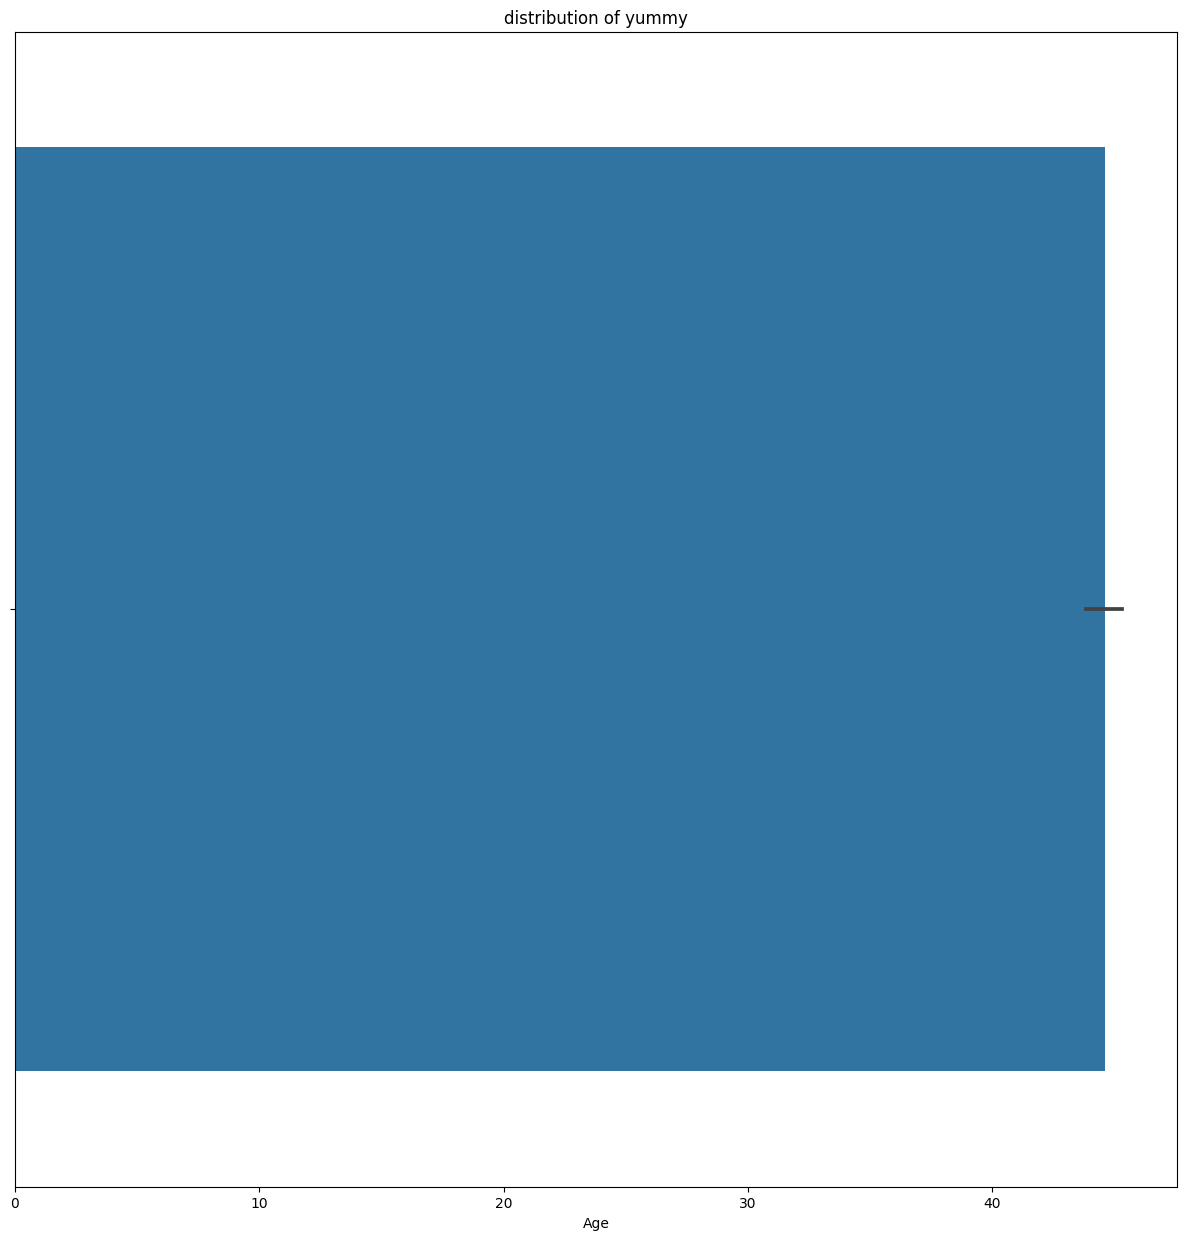

In [206]:
import seaborn as sns
plt.figure(figsize=(15,15))
plt.title('distribution of yummy')
sns.barplot(x='Age',data=df)

<Axes: title={'center': 'Distribution of Age'}, xlabel='Age', ylabel='Density'>

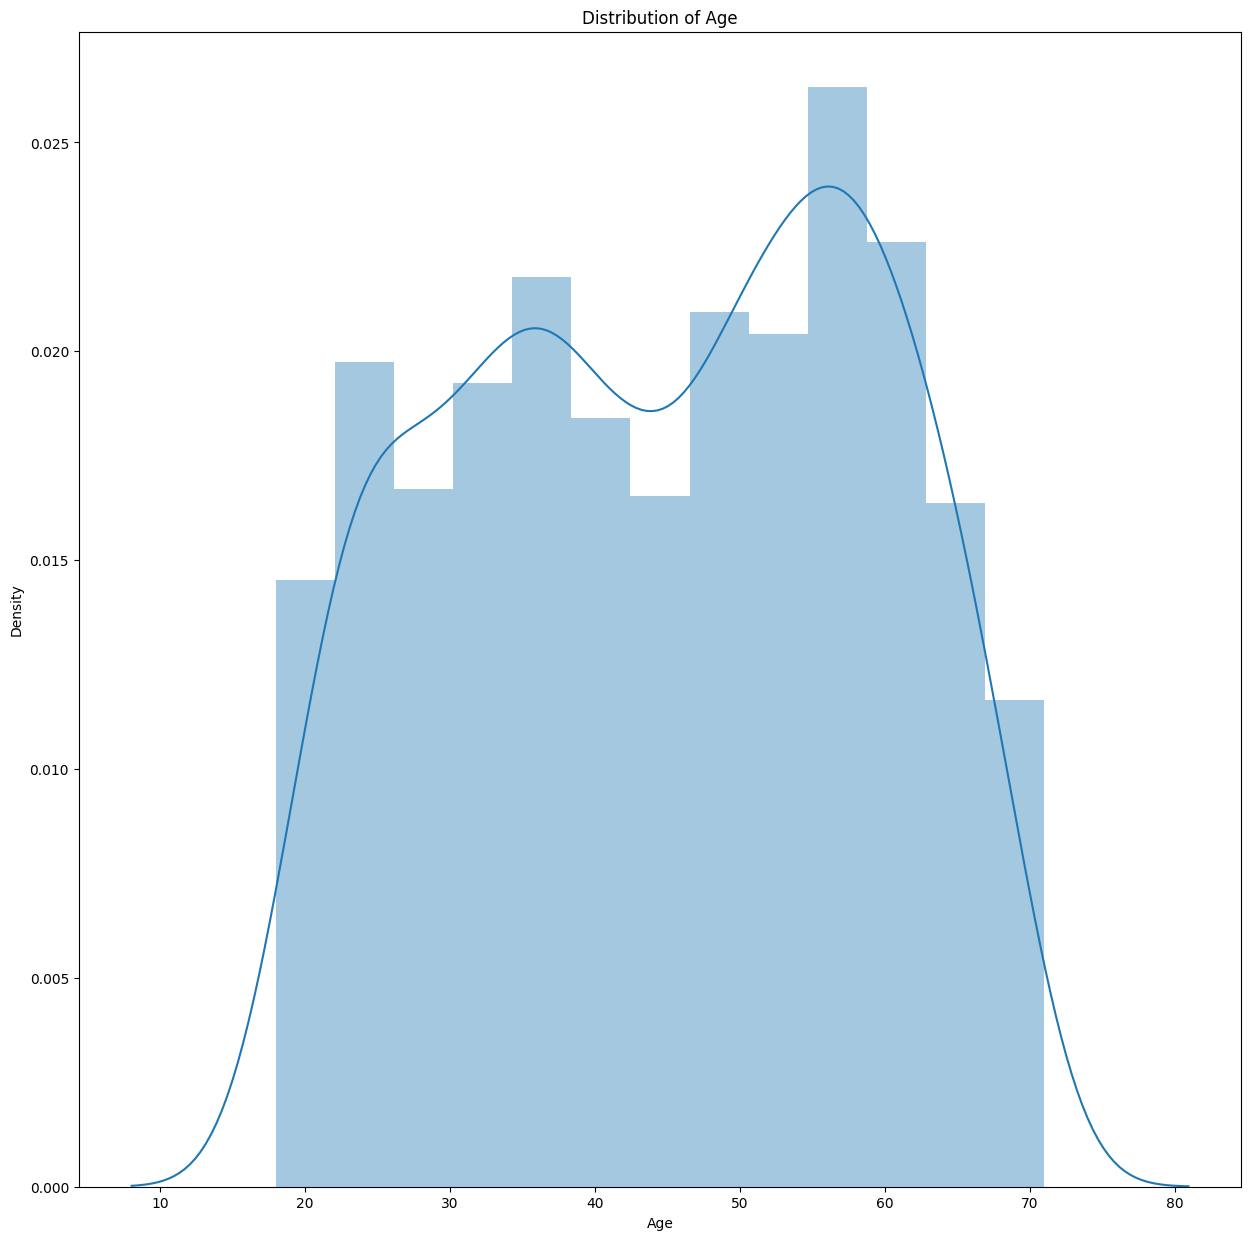

In [207]:
# Distribution of Age
plt.figure(figsize=(15,15))
plt.title("Distribution of Age")
sns.distplot(df['Age'])

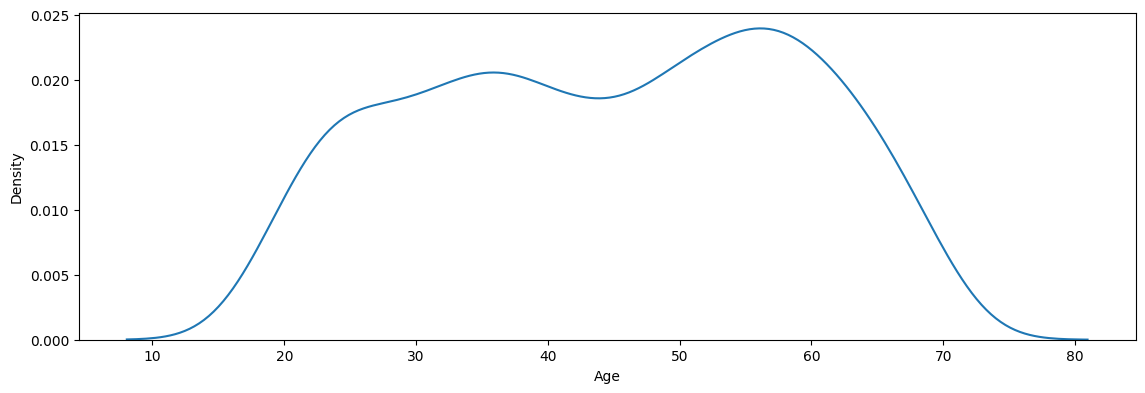

In [208]:
plt.figure(figsize=(30,45))
for i, col in enumerate(df.columns):
    if df[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(df[col], ax=ax)
        plt.xlabel(col)

plt.show()

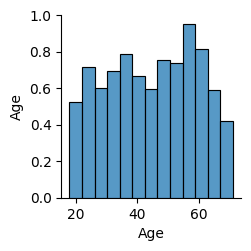

In [209]:
sns.pairplot(df)

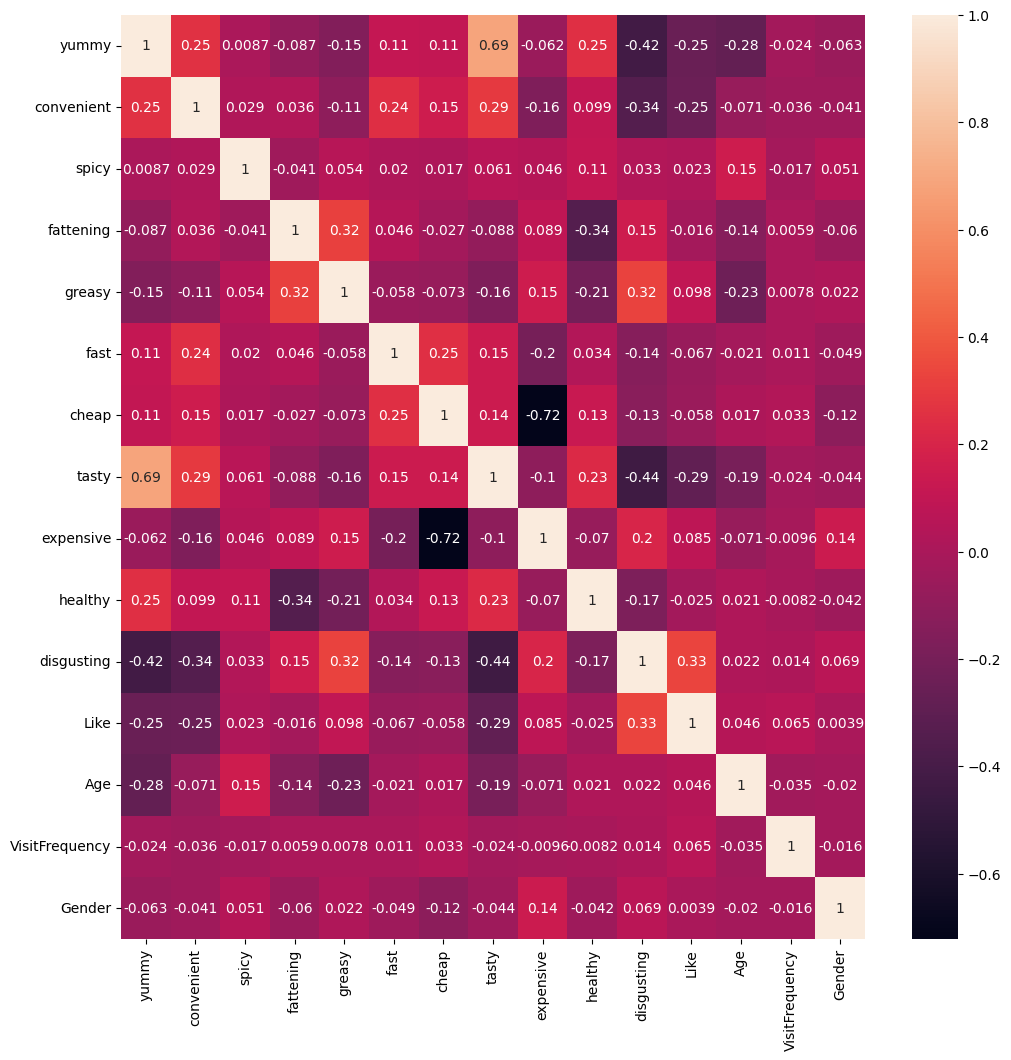

In [231]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [211]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["yummy"]=le.fit_transform(df["yummy"])
df["convenient"]=le.fit_transform(df["convenient"])
df["spicy"]=le.fit_transform(df["spicy"])
df["fattening"]=le.fit_transform(df["fattening"])
df["greasy"]=le.fit_transform(df["greasy"])
df["fast"]=le.fit_transform(df["fast"])
df["cheap"]=le.fit_transform(df["cheap"])
df["tasty"]=le.fit_transform(df["tasty"])
df["expensive"]=le.fit_transform(df["expensive"])
df["healthy"]=le.fit_transform(df["healthy"])
df["disgusting"]=le.fit_transform(df["disgusting"])
df["Like"]=le.fit_transform(df["Like"])
df["Age"]=le.fit_transform(df["Age"])
df["VisitFrequency"]=le.fit_transform(df["VisitFrequency"])
df["Gender"]=le.fit_transform(df["Gender"])

In [212]:
from sklearn.model_selection import train_test_split
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,6,43,0,0
1,1,1,0,1,1,1,1,1,1,0,0,1,33,0,0
2,0,1,1,1,1,1,0,1,1,1,0,0,44,0,0
3,1,1,0,1,1,1,1,1,0,0,1,3,51,4,0
4,0,1,0,1,1,1,1,0,0,1,0,1,31,3,1


In [213]:
data = df[['yummy','convenient','spicy','fattening','greasy','fast','cheap','tasty','expensive','healthy','disgusting','Age','Gender']].rename({'Gender':'label'},axis=1)

In [214]:
X = data.iloc[:, data.columns != 'label']
y = data.iloc[:, data.columns == 'label']


Splitting Data into Train And Test

In [215]:
# split the data into test and train by maintaing same distribution of output variable 'y_true'[stratify=y_true]
X_train, test_df, y_train, y_test = train_test_split(X, y, stratify=y,test_size=0.2)
# split the train data into train and cross calidation by maintaining same distrubution of output varaible 'y_train'[stratify=y_true]
train_df, cv_df, ytrain, y_cv = train_test_split(X_train, y_train,stratify=y_train, test_size=0.2)

In [216]:
print('Number of data points in train data:', train_df.shape[0])
print('Number of data points in test data:', test_df.shape[0])
print('Number of data points in cross validation data:',df.shape[0])

Number of data points in train data: 929
Number of data points in test data: 291
Number of data points in cross validation data: 1453


Model Building

In [217]:
test_df.head(2)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Age
1452,0,1,0,1,1,0,0,0,1,0,1,12
798,1,1,0,1,0,1,1,1,0,1,0,32


In [218]:
y_test.head(2)

,label
1452,1
798,1


In [219]:
scaled_df = scalar.fit_transform(df)

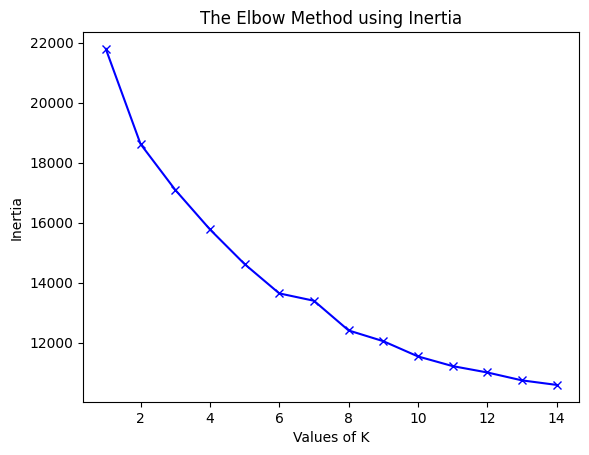

In [220]:
inertia = []
range_val = range(1,15)
for i in range_val:
    kmean = KMeans(n_clusters=i)
    kmean.fit_predict(pd.DataFrame(scaled_df))
    inertia.append(kmean.inertia_)
plt.plot(range_val,inertia,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

Model Building using KMeans

In [221]:
kmeans_model=KMeans(4)
kmeans_model.fit_predict(scaled_df)
pca_df_kmeans= pd.concat([pca_df,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)

In [222]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [223]:
knn = KNeighborsClassifier()

In [224]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [225]:
kYPred = knn.predict(X_train)

In [226]:
print(classification_report(y_train,kYPred))

              precision    recall  f1-score   support

           0       0.69      0.79      0.74       630
           1       0.70      0.57      0.63       532

    accuracy                           0.69      1162
   macro avg       0.69      0.68      0.68      1162
weighted avg       0.69      0.69      0.69      1162



In [227]:
confusion_matrix(y_train,kYPred)

array([[500, 130],
       [228, 304]])


Saving the Decision tree model for future prediction

In [228]:
import pickle
filename = 'final_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [229]:
# some time later...

# load the model from disk

In [230]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_train,y_train)
print(result,'% Acuuracy')

0.8330464716006885 % Acuuracy
